In [42]:
import gizmo_analysis as gizmo
import utilities as ut
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
from astroML.plotting import scatter_contour
%matplotlib notebook

In [3]:
# you can access the files as named or use the aliases in __init__.py to keep it shorter 
# for example, these are the same:

gizmo.gizmo_io
gizmo.io

<module 'gizmo_analysis.gizmo_io' from 'C:\\Users\\binod\\gizmo_analysis\\gizmo_io.py'>

In [ ]:
simname=''
simdir='C:\\Users\\binod\\m12i.res57000'
part = gizmo.io.Read.read_snapshots(['star'],'snapshot_index', 600, assign_hosts=True, assign_hosts_rotation=True , simulation_name=simname, simulation_directory=simdir+simname)


In [5]:
# properties of star particles are stored via dictionary

part['star'].keys()

dict_keys(['position', 'mass', 'massfraction', 'id.child', 'id.generation', 'id', 'potential', 'form.scalefactor', 'velocity'])

In [22]:
# 3-D position of star particle (particle number x dimension number) [kpc comoving]
starposition=part['star']['position']
starvelocity=part['star'].prop('host.velocity.principal')
print ("This is the array of position of all stars",starposition)
xall = part['star'].prop('host.distance.principal')[:,0]
yall = part['star'].prop('host.distance.principal')[:,1]
zall = part['star'].prop('host.distance.principal')[:,2]

print("Total no of star particles is",len(xall))
n=100

vxall=starvelocity[:,0]
vyall=starvelocity[:,1]
vzall=starvelocity[:,2]

x=xall[0:n]
y=yall[0:n]
z=zall[0:n]


vx=vxall[0:n]
vy=vyall[0:n]
vz=vzall[0:n]


This is the array of position of all stars [[43090.80575884 49686.35374503 41360.34283508]
 [44928.29340924 46498.85693528 41973.80607722]
 [44165.06982706 45905.57328081 47149.21746307]
 ...
 [41959.19387506 42547.66435227 46108.83355536]
 [41959.30623868 42547.42814527 46108.97969497]
 [41959.30737559 42547.08535602 46108.55536859]]
Total no of star particles is 3059250


<IPython.core.display.Javascript object>


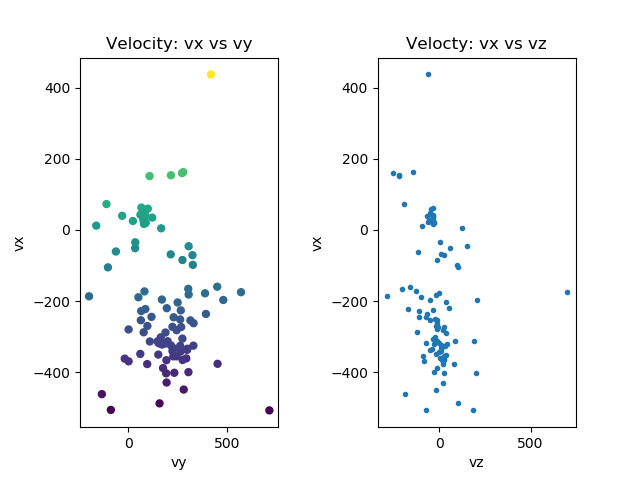

In [26]:

fig1=plt.figure()
ax1=fig1.add_subplot(121)
ax1.scatter(vy,vx,marker=".",s=100,c=vx)
ax1.set_xlabel('vy')
ax1.set_ylabel('vx')
ax1.set_title('Velocity: vx vs vy')

plt.subplots_adjust(wspace=0.5)


ax2=fig1.add_subplot(122)
ax2.scatter(vz,vx,marker=".")
ax2.set_xlabel('vz')
ax2.set_ylabel('vx')
ax2.set_title('Velocty: vx vs vz')


fig1.savefig("velocityplots.png")
plt.show()




In [ ]:
plt.close('all')

fig3 = plt.figure()
ax4 = fig3.add_subplot(111)

plt.contour(x,y)

plt.subplots_adjust(left=0.5)
ax4.hist(star_age)
ax4.set_xlabel('Age of the universe in Gyr')
ax4.set_ylabel('No of stars')
ax4.set_title('Age Histogram')

fig2.savefig("contourplots.png")

<IPython.core.display.Javascript object>


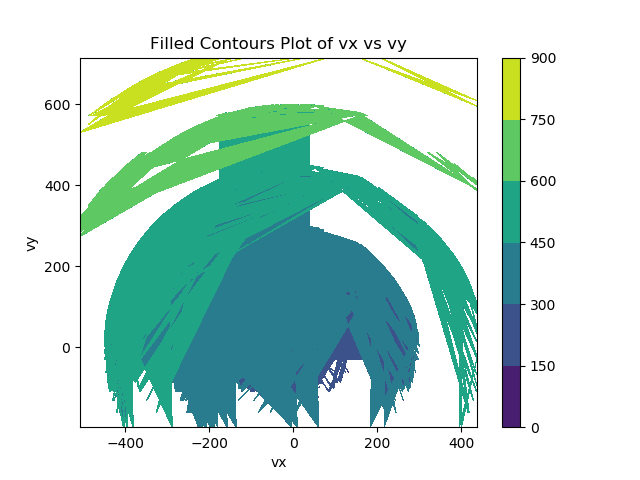

In [40]:
xlist = vx
ylist = vy
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig4=plt.figure()
ax4=fig4.add_subplot(111)
cp = ax4.contourf(X, Y, Z)
fig4.colorbar(cp) # Add a colorbar to a plot
ax4.set_title('Filled Contours Plot of vx vs vy')
ax4.set_xlabel('vx')
ax4.set_ylabel('vy')
plt.show()
fig4.savefig("contourplotsvelocity.png")

In [44]:
fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(x,y, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlabel('x')
ax.set_ylabel('y')


plt.show()

<IPython.core.display.Javascript object>

ValueError: Contour levels must be increasing